# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [21]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

PCA is principal component analysis and it finds correlations by maximizing variance to reduce features down to latent features. It does this by finding vectors that best explain the variance in the data. Each next vector is orthogonal to the previous one. For housing price data, PCA could reduce the number of rooms and number of bathrooms down to a house size principal component. Judging from the data features I'm not too sure how PCA would reduce it. I think the first component could be supermarket items and the second could be restaurant items.

ICA is independent component analysis and it assumes the output data is a mixture of some number of independent source vectors. When ICA used on eigenfaces, the type of vectors that return represent facial features like eyes, mouth, and hair. With this in mind, a few type of ICA vectors could be processed foods, drinks, fruits and vegetables. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000032ECEA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000035D85860>]], dtype=object)

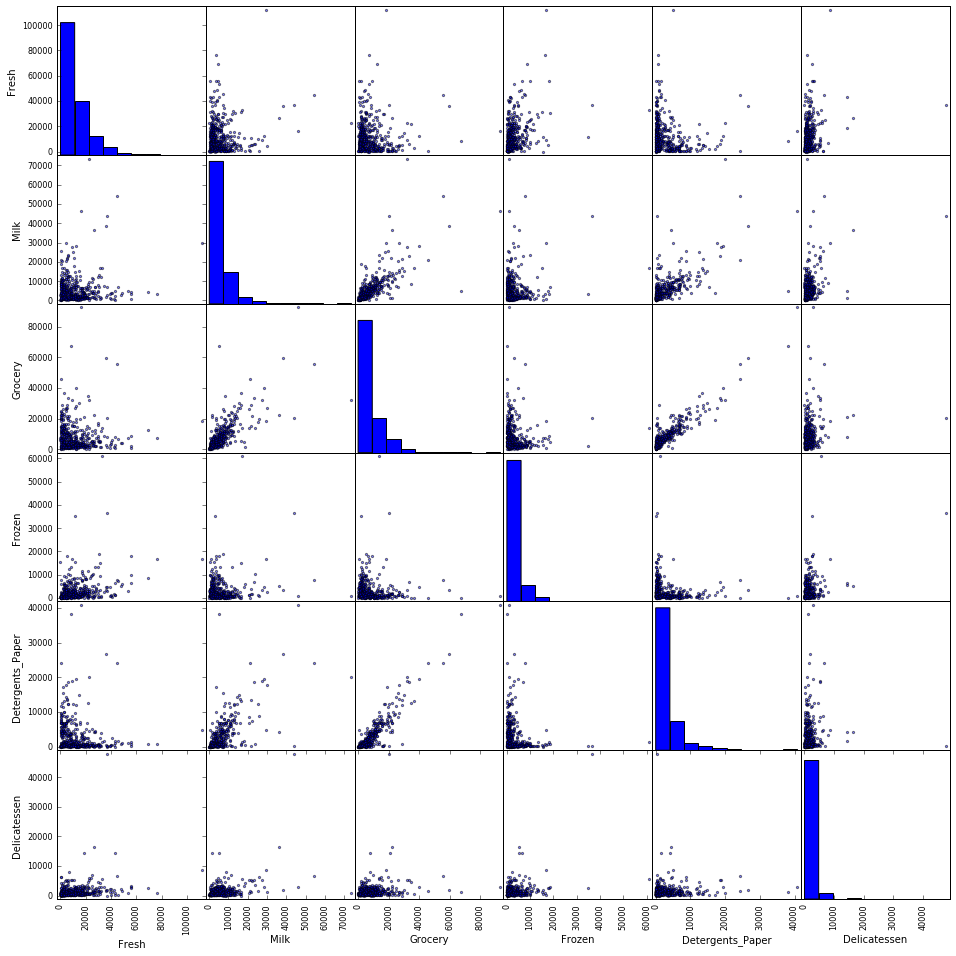

In [47]:
#Inspect variable relationships with scatter plot
from pandas.tools.plotting import scatter_matrix

scatter_matrix(data, figsize=(16, 16))

###PCA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002D065CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000032D283C8>]], dtype=object)

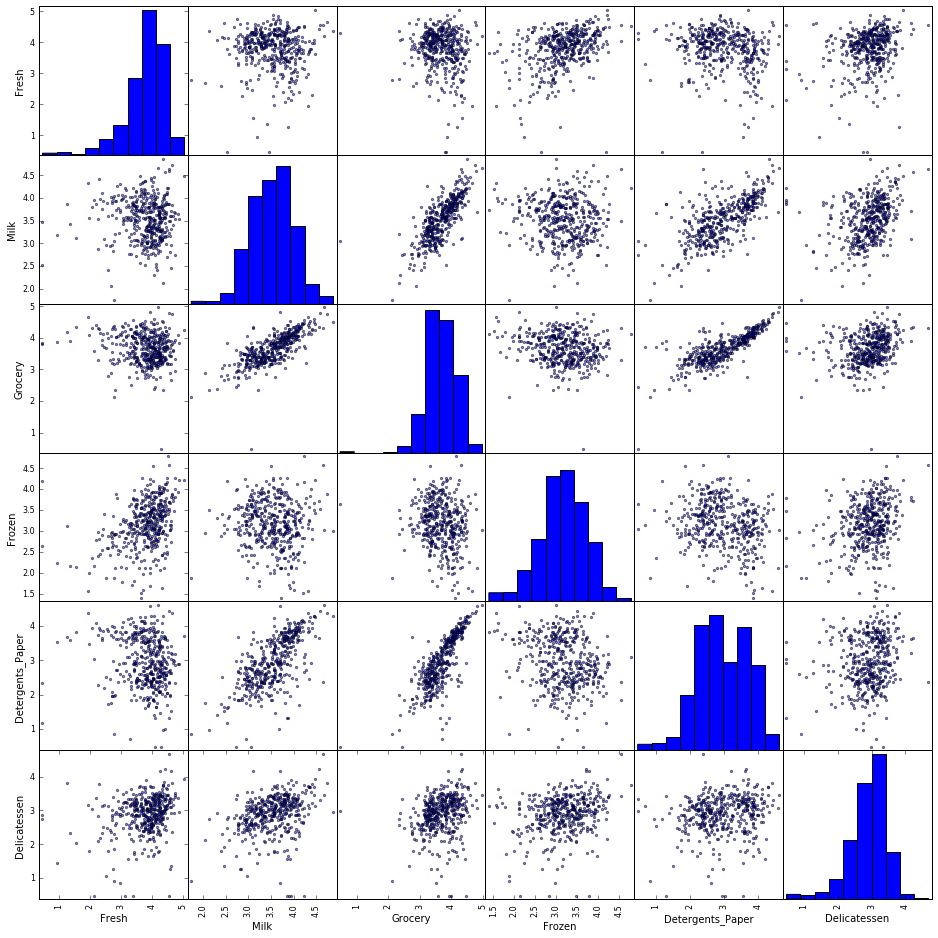

In [46]:
#Inspect variable relationships with scatter plot on scaled log base 10 data
data_log = np.log10(data)
scatter_matrix(data_log, figsize=(16, 16))

The histograms of the original data show a negative skew. I transformed the data using log based 10 and now the histograms look more normally distributed.

In [83]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_log)
print data_log.head()

# Print the components and the amount of variance in the data contained in each dimension
print '\n', pca.components_
print pca.explained_variance_ratio_

<class 'pandas.core.frame.DataFrame'>
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  4.102742  3.984797  3.878579  2.330414          3.427161      3.126456
1  3.848620  3.991669  3.980821  3.246006          3.517592      3.249443
2  3.802979  3.944877  3.885587  3.381115          3.546049      3.894538
3  4.122707  3.077731  3.625415  3.806451          2.705008      3.252368
4  4.354397  3.733197  3.857212  3.592732          3.249687      3.714749

[[-0.17371704  0.394463    0.45436364 -0.17219603  0.74551495  0.1494356 ]
 [ 0.68513571  0.16239926  0.06937908  0.487691    0.04191162  0.50970874]
 [ 0.67351166 -0.03306794  0.03218274 -0.28481122  0.21824404 -0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [ 0.00082162 -0.72228834 -0.34799325  0.03624337  0.56366476  0.19536639]
 [ 0.02927638 -0.54303508  0.81390826  0.0174477  -0.20244363  0.02283197]]
[ 0.44237417  0.27657107  0.11617342  0.09617719  0.0457568   0.02

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

Variance drops off sharply after 2 dimensions. The first explains ~44% and the second ~28%. The next dimension explains only 12% of the variance. The first 2 variables account for ~72% of the variance and both appear significant. The 3 variable accounts for ~12% but this is less than half the 2nd. I will choose just 2 PCs for my analysis.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

For the data I'm deeming important any component value with an absolute value >= .5 .  The first component seems to represent restaurant items. Detergents_Paper data is 74.6% correlated with this PC. The second component seems to represent Grocery store items. Fresh and Delicatessen data is 68.5% and 51.0% correlated respectively. The Frozen data had a 48.8% explanation of the variance but it was under the cutoff. 

This information can be used for feature reduction. We can feed this data into a clustering algorithm and then examine the clusters for determining the different types of customers for our client.

###ICA

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
C1  0.050326 -0.006613 -0.007517 -0.003217          0.011622     -0.002667
C2 -0.003322  0.019349  0.107768 -0.007277         -0.133200     -0.016082
C3 -0.010917 -0.001081  0.007366  0.054118         -0.002557     -0.016780
C4  0.004910  0.001606  0.005590  0.002528         -0.002414     -0.051004
C5 -0.002471  0.012721 -0.071105 -0.001303          0.015649      0.005519
C6 -0.002059 -0.072275  0.056762  0.001628         -0.018053      0.016866


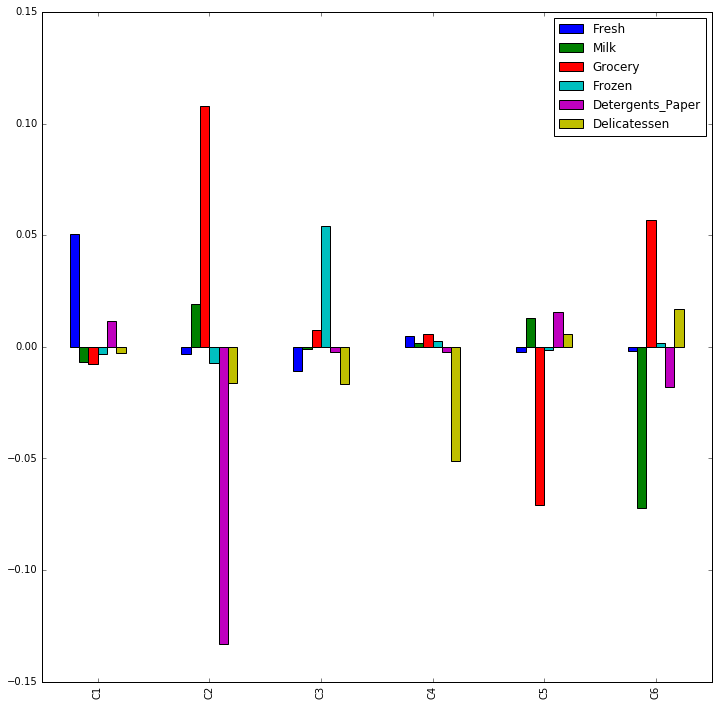

In [102]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

#Get standardized data
data_std = (data - data.mean() * 1.0) / data.std()

ica = FastICA()
ica.fit(data_std)

#Normalize component mixing matrix
row_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
components_df = pd.DataFrame(ica.components_,columns=data_std.columns, index=row_names)
#components_all_pos_df = components_df - components_df .min()

# Print the independent components
print components_df
components_df.plot(kind='bar', figsize=(12, 12))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

In ICA decomposition the algorithm tries to determine the underlying signal for each feature. C1 is composed mostly of fresh so this could be fruits and vegetables. C2 is composed mostly of detergent_paper and grocery so this could be supplies/non-edible items. C3 is composed mostly of frozen, but I'm not exactly sure what the underlying component would be other than just frozen. C4 is composed mainly of delicatessen which could be ready to eat foods. C4 is composed mostly of grocery, so this could be processed foods. C5 is composed mostly of milk and groceries so this could be drinks. C6 is composed mostly of fresh so this could be fruits and vegetables.

These components could be used to transform our data which would help eliminate the noise. This transformed data could then be used as in input in a clustering algorithm to determine the different groups of customers our client has. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means will will group each data point into one of K number of clusters. Each we want a rigid assignment then this is an advantage. On the other hand if we want a probabilistic assignment than that is the advantage of the Gaussian Mixture model. This model would give each data point a probability of being in each one of the K clusters.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [107]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [167]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_log)

print reduced_data[:10]  # print upto 10 elements

[[ 0.76044326  0.03062437]
 [ 0.78188873  0.37772918]
 [ 0.82243908  0.72814713]
 [-0.4895858   0.63319366]
 [ 0.34600739  1.06874039]
 [ 0.47069865  0.17065273]
 [ 0.49188628 -0.08755458]
 [ 0.68725963  0.42048236]
 [ 0.37862888 -0.2591691 ]
 [ 1.25462601  0.32185674]]


In [168]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=4)
clusters.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [169]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [170]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[ 0.99582255 -1.04296311]
 [-0.40109611  0.46297292]
 [ 0.93758731  0.351895  ]
 [-1.00624157 -0.45230365]]


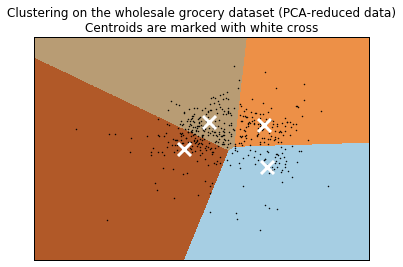

In [171]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

The central object represents the location that minimizes the average distance between that location and all points in that cluster. As far as customers, this would be the average customer for a certain customer group. 

Assuming PC1 is restaurant items and PC2 is supermarket items the clusters can be broken down as follows. The group labeled by the first centroid [0.99582255 -1.04296311] could be bars. They would have a high PC1 compared with PC2.  The group labeled by the second centroid [-0.40109611  0.46297292] could be similar to a farmers market. They would have a very low PC1 compared with PC2. The group labeled by the third centroid [0.93758731  0.351895] could be grocery stores. They would have a high PC1 and PC2. They would have a very low PC1 compared with PC2. The last group labeled by the fourth centroid  [-1.00624157 -0.45230365] could be convenience stores. They would have a low PC1 and PC2.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

I think clustering gave me the most insight into the data because I was able to visually see the divisions of data points. But this clustering was done on PCA transformed data. If I didn't believe that the first 2 PCA components were representative of the underlying latent data features than this clustering algorithm is pointless. Therefore I have to choose both PCA and clustering as giving me the most insight.

It was difficult for me to grasp ICA in how it related to this data set. ICA is easy to conceptually apply to the coctail problem, but it was hard for me to think about how these components would relate to a customer type.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Since we defined our customer types using this technique, the company will now have certain customer types to test on. When the company wants to test an experiment they can run it on a % of a certain group instead of on everyone like they did previously.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

This question is a little ambiguous to me, so I'll answer the 2 questions it could be:

1 - How would you use this data to predict the needs of a future customer?

When get a new customer we can ask that customer what type of business he/she runs. We can then use our clustering data to determine the average yearly M.U. spent on the 6 different types of items. If our client has more detailed information we could even predict amount of items that customer would want on a daily/weekly/monthly basis.

2 - How would you use this data to predict a current customer's future needs?

First we will find out what the average customer in this group needs are and compare it with this customer. We could predict this client's future yearly spending on each item category will revert to the mean of their group and advise them if they should increase their budget in a certain area. If our client has no other data we can use I can't think of any other things to do.